In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [2]:
train_data = pd.read_csv('Train.csv')
print("Shape of train_data:", train_data.shape)

Shape of train_data: (42000, 785)


In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)

Shape of X after separating features: (42000, 784)


In [5]:
X.isnull().sum().sum()

0

In [6]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


In [7]:
y[15:]

15       1
16       2
17       0
18       7
19       5
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 41985, dtype: int64

In [8]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


In [9]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=42)
X_val.shape, X_test.shape

((7560, 28, 28, 1), (840, 28, 28, 1))

In [12]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(), 
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(10, activation='softmax')    
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8370 - loss: 0.5590 - val_accuracy: 0.9525 - val_loss: 0.1654
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9608 - loss: 0.1346 - val_accuracy: 0.9593 - val_loss: 0.1294
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9750 - loss: 0.0865 - val_accuracy: 0.9652 - val_loss: 0.1143
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9783 - loss: 0.0687 - val_accuracy: 0.9692 - val_loss: 0.1045
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.0475 - val_accuracy: 0.9743 - val_loss: 0.0883
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9886 - loss: 0.0357 - val_accuracy: 0.9684 - val_loss: 0.1112
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9694 - val_loss: 0.1143
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0219 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9636 - loss: 0.1313
Validation Accuracy: 96.53%


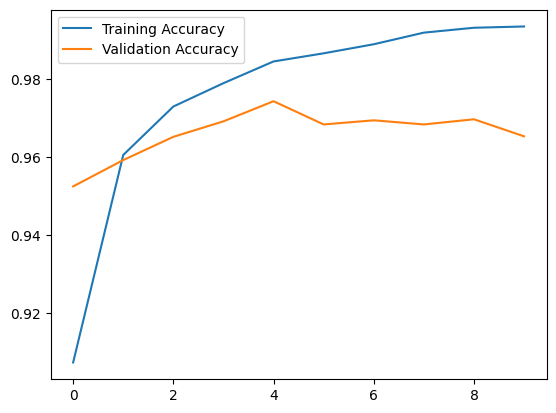

In [14]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


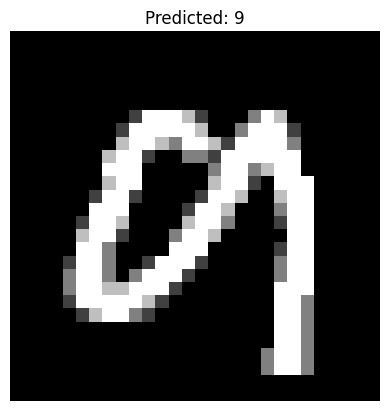

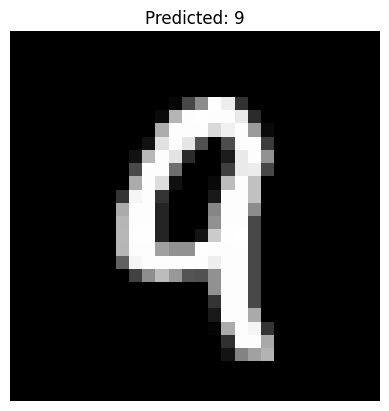

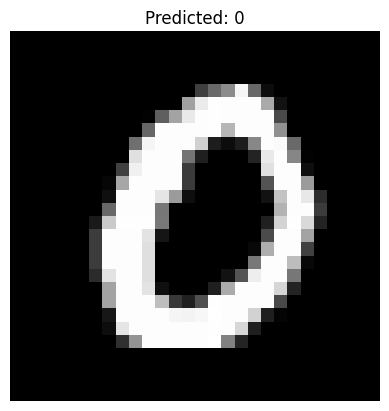

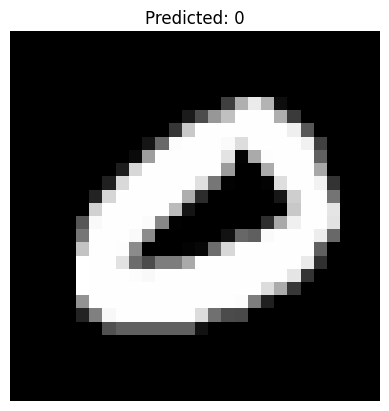

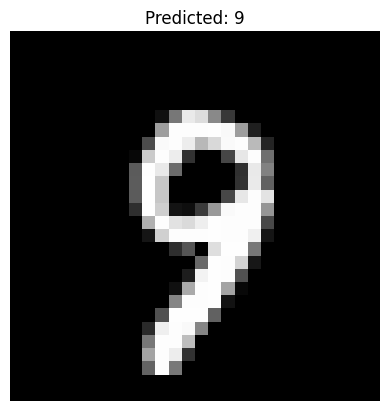

In [15]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()